In [2]:
import gym
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from agents.TD3 import TD3
# from agents.DDPG import DDPG
# from agents.DDPG2 import DDPG2

In [3]:
PATH = "/Volumes/BC_Clutch/Dropbox/DeepRLND/rl_continuous_control/"
RESULT_PATH = PATH + "results/"

In [4]:
results = pd.read_pickle(RESULT_PATH + "Reacher20_201812270526_ResultDict.pkl")

In [10]:
results['DDPG']['Scores'].shape

(20,)

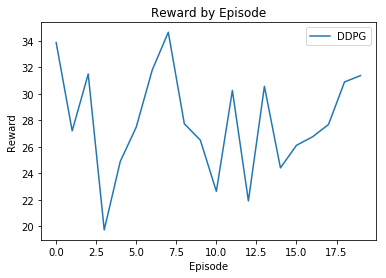

In [11]:
data = results['DDPG']['Scores']
plt.plot(np.arange(len(data)), data, label="DDPG")
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title("Reward by Episode")
plt.legend()

In [ ]:
result_list = {
               "BipedalWalker-v2_201812192036_TD3_0.npy",
               "BipedalWalker-v2_201812192036_DDPG_0.npy",
               "BipedalWalker-v2_201812192036_DDPG2_0.npy"
              }

In [ ]:
def plot_result(RESULT_PATH, result_list):
    for result in result_list:
        data = np.load(RESULT_PATH + result)
        label = result.split("_")[-2]
        plt.plot(np.arange(len(data)), data, label=label)
    plt.ylabel('Reward')
    plt.xlabel('Episode')
    plt.title("Reward by Episode")
    plt.legend()

In [ ]:
plot_result(RESULT_PATH, result_list)

In [ ]:
result = pd.read_pickle(RESULT_PATH + "BipedalWalker-v2_201812192036_ResultDict_DDPG.pkl")
result.keys()

In [ ]:
result['TD3'].keys()

In [ ]:
len(result['TD3']['scores'])

In [ ]:
len(result['TD3']['evaluations'])

In [ ]:
result['TD3']['clocktime']

In [ ]:
def plot_result2(RESULT_PATH, result_pkl):
    data = pd.read_pickle(RESULT_PATH + result_pkl)
    for agent in data.keys():
#         data = np.load(RESULT_PATH + result)
#         label = result.split("_")[-2]
        x = range(len(data[agent]['evaluations']))
        y = data[agent]['evaluations']
        plt.plot(x, y, label=agent)
    plt.ylabel('Reward')
    plt.xlabel('Episode')
    plt.title("Reward by Episode")
    plt.legend()

In [ ]:
plot_result2(RESULT_PATH, "BipedalWalker-v2_201812192036_ResultDict_DDPG.pkl")

In [ ]:
# result['TD3']

### Run trained agent

In [3]:
def run_agent(RESULT_PATH, env_name, agent, actor_path, critic_path):
    env = gym.make(env_name)
    agent = agent(env.observation_space.shape[0], env.action_space.shape[0], float(env.action_space.high[0]))
    agent.actor.load_state_dict(torch.load(RESULT_PATH + actor_path,map_location={'cuda:0': 'cpu'}))
    agent.critic.load_state_dict(torch.load(RESULT_PATH + critic_path,map_location={'cuda:0': 'cpu'}))

    state = env.reset()
    while True:
        action = agent.select_action(state)
        env.render()
        next_state, reward, done, _ = env.step(action)
        state = next_state
        if done:
            break

    env.close()

In [ ]:
run_agent(RESULT_PATH,"BipedalWalker-v2",DDPG,'DDPG-BipedalWalker-v2-0_actor.pth','DDPG-BipedalWalker-v2-0_critic.pth')

In [ ]:
# run_agent(RESULT_PATH,"BipedalWalker-v2",DDPG2,'DDPG2-BipedalWalker-v2-0_actor.pth','DDPG2-BipedalWalker-v2-0_critic.pth')

In [ ]:
run_agent(RESULT_PATH,"BipedalWalker-v2",TD3,'TD3-BipedalWalker-v2-0_actor.pth','TD3-BipedalWalker-v2-0_critic.pth')

In [4]:
run_agent(RESULT_PATH,"LunarLanderContinuous-v2",TD3,
          'LunarLanderContinuous-v2_201812192036_TD3_0_actor.pth',
          'LunarLanderContinuous-v2_201812192036_TD3_0_critic.pth')

In [ ]:
run_agent(RESULT_PATH,"LunarLanderContinuous-v2",DDPG2,
          'LunarLanderContinuous-v2_201812192036_DDPG2_0_actor.pth',
          'LunarLanderContinuous-v2_201812192036_DDPG2_0_critic.pth')